In [46]:
import torch
import torch.nn  as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [2]:
data = torchvision.datasets.CIFAR10(root = './data',train = True,download = True, transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
trainloader = torch.utils.data.DataLoader(data,batch_size = 4,shuffle = True)

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(images[1].shape)
print(labels[1].item())



torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


In [11]:
img = images[1]
type(img)
img.shape

torch.Size([3, 32, 32])

In [12]:
npimg = img.numpy()
type(npimg)
npimg.shape

(3, 32, 32)

In [13]:
npimg = np.transpose(npimg,[1,2,0])
npimg.shape

(32, 32, 3)

<function matplotlib.pyplot.show>

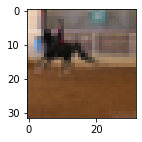

In [15]:
plt.figure(figsize = (2,2))
plt.imshow(npimg)
plt.show

In [17]:
class FirstNN(nn.Module):
  def __init__(self):
    super(FirstNN,self).__init__()
    self.conv1 = nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2))

  def forward(self,x):
    x = self.conv1(x)
    return x

In [18]:
net = FirstNN()

In [19]:
out = net(images)

In [20]:
out.shape

torch.Size([4, 16, 16, 16])

In [21]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [26]:
out[0,0,:,:].detach().numpy().shape

(16, 16)

<function matplotlib.pyplot.show>

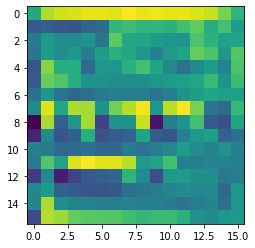

In [32]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show

In [37]:
class FirstNN2(nn.Module):
  def __init__(self):
    super(FirstNN2,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3),
        nn.Conv2d(8,16,3)
    )

  def forward(self,x):
    x = self.model(x)
    return x

In [38]:
net = FirstNN2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

<function matplotlib.pyplot.show>

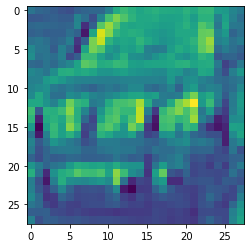

In [39]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show

In [41]:
class FirstNN3(nn.Module):
  def __init__(self):
    super(FirstNN3,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,5),
        nn.AvgPool2d(2,stride=2)
    )
  def forward(self,x):
    x = self.model(x)
    return(x)

In [43]:
net = FirstNN3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

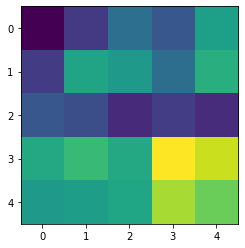

In [44]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

In [49]:
class KNet(nn.Module):
  def __init__(self):
    super(KNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(8,16,5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
  def forward(self,x):
    x = self.cnn_model(x)
    x = x.view(x.size(0),-1)
    x = self.fc_model(x)
    return x

In [47]:
def evaluation(dataloader):
  total,correct = 0,0
  for data in dataloader:
    inputs,labels = data
    outputs = net(inputs)
    _,pred = torch.max(ouputs.data,1)
    total += labels.size(0)
    correct += (correct == labels).sum().item()
  return 100 * correct/total
  

In [50]:
net = KNet()
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [52]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [53]:
loss_arr = []
loss_epoc_arr = []
max_epoch = 16

for epoch in range(max_epoch):
  for i,data in enumerate(trainloader,0):
    inputs, labels = data
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())

  Print('Epoch: %d%d, Test Acc: %0.2f, Train Acc: %0.2f'%(epoch,max_epoch,evaluation(testloader),evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show

RuntimeError: ignored